In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
## load the data form csv file to Pandas DataFrame

df = pd.read_csv("suv_data.csv")

In [4]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# number of rows and columns
df.shape

(400, 5)

In [6]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# to check the number of missing value in each column
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
dfNew = df.drop(['User ID','Gender'], axis=1, inplace=False)
dfNew.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
# Getting some statistical measures about the data
dfNew.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Data Visualization

In [17]:
sns.set()

<Axes: xlabel='Purchased', ylabel='count'>

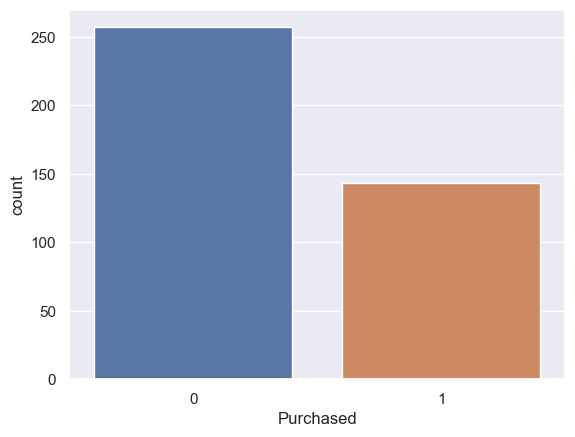

In [18]:
# making a count plot for "Purchased" column
sns.countplot(x='Purchased', data=dfNew)


In [19]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

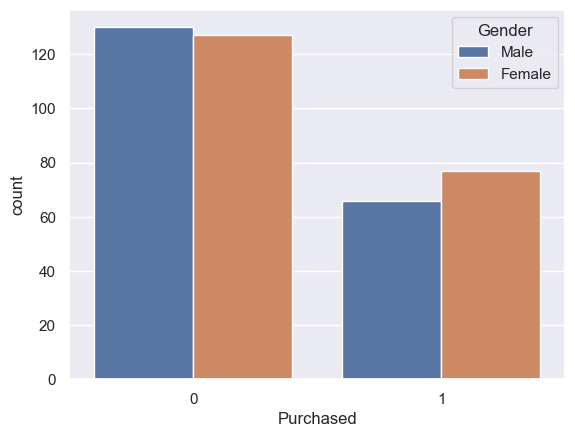

In [20]:
# making a count plot for "Gender" column
sns.countplot(x="Purchased", hue="Gender", data=df)

In [21]:
dfNew.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
X = dfNew.drop(['Purchased'], axis=1, inplace=False)
Y = df['Purchased']

In [24]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Splitting the Data into training data & Test Data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0 )

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(400, 2) (300, 2) (100, 2)


## Model Training

## Logistic Regression 

In [42]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predict = model.predict(X_test)
model.score(X_test, Y_test)

0.68

In [44]:
from sklearn.metrics import classification_report
classification_report(Y_test,predict)

C:\Users\ADITYA KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADITYA KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADITYA KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.68      1.00      0.81        68\n           1       0.00      0.00      0.00        32\n\n    accuracy                           0.68       100\n   macro avg       0.34      0.50      0.40       100\nweighted avg       0.46      0.68      0.55       100\n'

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predict)

array([[68,  0],
       [32,  0]], dtype=int64)

In [47]:
accuracy_score(Y_test,predict)

0.68